In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_style('whitegrid')

# Load GTD dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1', low_memory=False)

print("Data loaded successfully:")
display(df.head())
df.info()

Data loaded successfully:


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Categorical Variable Frequencies:


--- attacktype1_txt ---


,count
attacktype1_txt,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659



--- weaptype1_txt ---


,count
weaptype1_txt,
Explosives,92426
Firearms,58524
Unknown,15157
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114



--- targtype1_txt ---


,count
targtype1_txt,
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Unknown,5898
Religious Figures/Institutions,4440



--- region_txt ---


,count
region_txt,
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456



--- success ---


,count
success,
1,161632
0,20059



Numerical Variable Descriptions:



,nkill,nwound
count,171378.000000,165380.000000
mean,2.403272,3.167668
std,11.545741,35.949392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


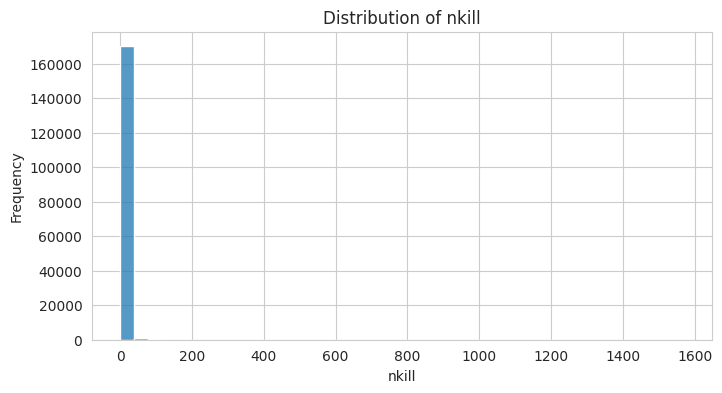

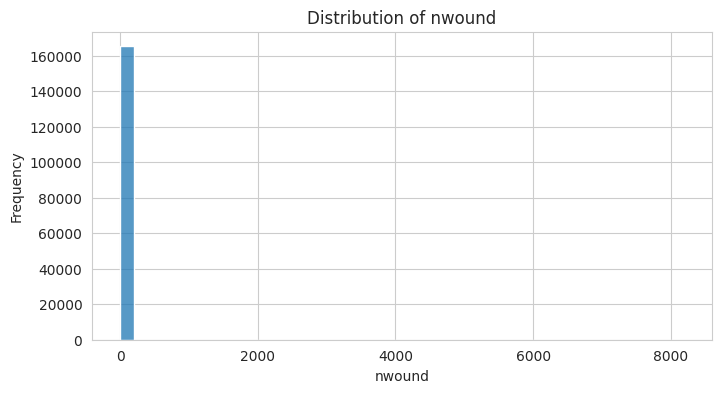

In [2]:
# ----- Exploratory Descriptive Analysis -----

# Key categorical variables
categorical_cols = [
    'attacktype1_txt',
    'weaptype1_txt',
    'targtype1_txt',
    'region_txt',
    'success'
]

print("Categorical Variable Frequencies:\n")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    display(df[col].value_counts().head(10))

# Key numerical variables
numerical_cols = ['nkill', 'nwound']

print("\nNumerical Variable Descriptions:\n")
display(df[numerical_cols].describe())

# Distribution inspection
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [3]:
# ----- Define Events -----

# Numerical thresholds based on exploration
fatal_threshold = 0                     # Fatal attack
mass_casualty_threshold = df['nkill'].quantile(0.90)  # Top 10% severity

# Event A: Fatal attack
filter_A = df['nkill'] > fatal_threshold

# Event B: Successful attack
filter_B = df['success'] == 1

# Event C: Mass-casualty event
filter_C = df['nkill'] >= mass_casualty_threshold

# Intersection events
filter_A_and_B = filter_A & filter_B
filter_A_and_C = filter_A & filter_C

N = len(df)

print(f"Total Observations (N): {N}")
print(f"Fatality threshold: nkill > {fatal_threshold}")
print(f"Mass-casualty threshold (90th percentile): nkill ≥ {mass_casualty_threshold:.0f}")


Total Observations (N): 181691
Fatality threshold: nkill > 0
Mass-casualty threshold (90th percentile): nkill ≥ 5


In [4]:
# ----- Conditional Probability -----

P_A = filter_A.mean()
P_B = filter_B.mean()
P_C = filter_C.mean()

P_A_and_B = filter_A_and_B.mean()
P_A_and_C = filter_A_and_C.mean()

P_A_given_B = P_A_and_B / P_B
P_C_given_A = P_A_and_C / P_A

print(f"P(A) Fatal Attack = {P_A:.4f}")
print(f"P(B) Successful Attack = {P_B:.4f}")
print(f"P(C) Mass-Casualty Event = {P_C:.4f}")

print(f"\nP(A | B) = {P_A_given_B:.4f}")
print(f"P(C | A) = {P_C_given_A:.4f}")


P(A) Fatal Attack = 0.4581
P(B) Successful Attack = 0.8896
P(C) Mass-Casualty Event = 0.1090

P(A | B) = 0.4955
P(C | A) = 0.2380


In [5]:
# ----- Independence Check -----

product_AB = P_A * P_B
difference = abs(P_A_and_B - product_AB)

print(f"P(A ∩ B) = {P_A_and_B:.4f}")
print(f"P(A)P(B) = {product_AB:.4f}")

if difference < 0.01:
    print("Conclusion: Events are approximately INDEPENDENT.")
else:
    print("Conclusion: Events are DEPENDENT.")


P(A ∩ B) = 0.4408
P(A)P(B) = 0.4075
Conclusion: Events are DEPENDENT.


In [6]:
# ----- Bayes' Rule -----

P_B_given_A_Bayes = (P_A_given_B * P_B) / P_A
P_B_given_A_Empirical = filter_A_and_B.mean() / filter_A.mean()

print(f"P(B | A) via Bayes' Rule: {P_B_given_A_Bayes:.4f}")
print(f"P(B | A) Empirical: {P_B_given_A_Empirical:.4f}")
print(f"Difference: {abs(P_B_given_A_Bayes - P_B_given_A_Empirical):.8f}")


P(B | A) via Bayes' Rule: 0.9622
P(B | A) Empirical: 0.9622
Difference: 0.00000000


Mean (μ): 2.40
Standard Deviation (σ): 11.55


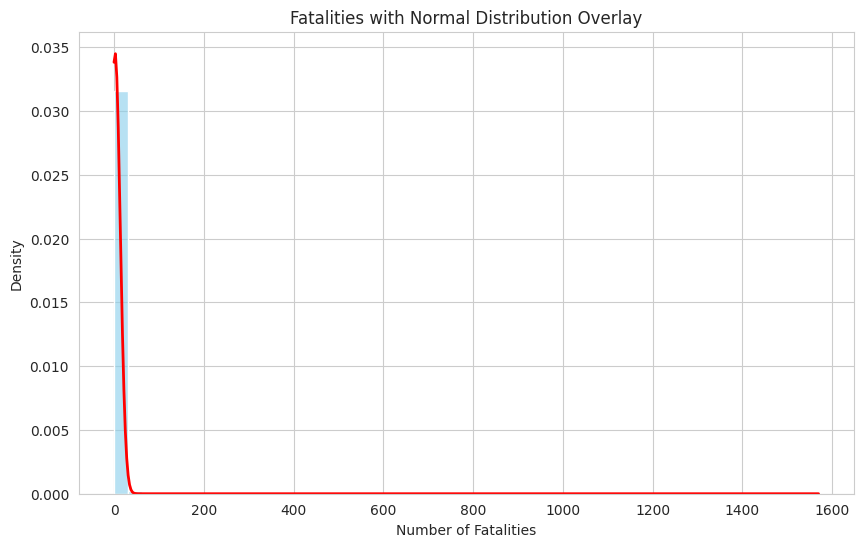

In [7]:
# ----- Normal Distribution Analysis -----

numerical_variable = 'nkill'
data_series = df[numerical_variable].dropna()

mu = data_series.mean()
sigma = data_series.std()

print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")

plt.figure(figsize=(10,6))
sns.histplot(data_series, bins=50, stat='density', color='skyblue', alpha=0.6)

x = np.linspace(data_series.min(), data_series.max(), 500)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title("Fatalities with Normal Distribution Overlay")
plt.xlabel("Number of Fatalities")
plt.ylabel("Density")
plt.show()


In [8]:
# ----- Normal Probability Calculations -----

P_greater_mu = norm.sf(mu, mu, sigma)
P_1sigma = norm.cdf(mu + sigma, mu, sigma) - norm.cdf(mu - sigma, mu, sigma)
P_less_2sigma = norm.cdf(mu - 2*sigma, mu, sigma)

print(f"P(X > μ) = {P_greater_mu:.4f}")
print(f"P(μ - σ < X < μ + σ) = {P_1sigma:.4f}")
print(f"P(X < μ - 2σ) = {P_less_2sigma:.4f}")

median = data_series.median()
print(f"\nMean = {mu:.2f}, Median = {median:.2f}")

print("\nNormality Comment:")
print("Fatalities show right-skewness with heavy tails.")
print("Mean exceeds median, indicating extreme high-impact attacks.")
print("Normal approximation is useful for risk modeling but imperfect.")


P(X > μ) = 0.5000
P(μ - σ < X < μ + σ) = 0.6827
P(X < μ - 2σ) = 0.0228

Mean = 2.40, Median = 0.00

Normality Comment:
Fatalities show right-skewness with heavy tails.
Mean exceeds median, indicating extreme high-impact attacks.
Normal approximation is useful for risk modeling but imperfect.


### Justification for Column Selection and Event Definitions

#### Column Selection Justification

We selected the following columns for our analysis because they are crucial for understanding the characteristics and impact of terrorist attacks:

**Categorical Variables:**
*   `attacktype1_txt`: This variable describes the primary type of attack (e.g., bombing, armed assault). It is essential for categorizing and analyzing the tactics employed by perpetrators.
*   `weaptype1_txt`: This describes the primary weapon used in the attack. Understanding weapon types helps in assessing the lethality and methods of attacks.
*   `targtype1_txt`: This variable indicates the primary target type (e.g., business, government, civilians). It provides insight into the motivations and strategic choices of terrorist groups.
*   `region_txt`: This categorical variable identifies the geographic region where the attack occurred. It is vital for conducting regional analyses and identifying hotspots or patterns across different parts of the world.
*   `success`: This binary variable indicates whether the attack was successful (1) or unsuccessful (0). It is fundamental for evaluating the effectiveness of attacks and understanding factors contributing to their outcome.

**Numerical Variables:**
*   `nkill`: Represents the number of fatalities caused by the attack. This is a direct and critical measure of an attack's severity and human cost.
*   `nwound`: Represents the number of people wounded in the attack. Along with `nkill`, it provides a comprehensive view of the casualties and physical impact of an incident.

These variables collectively allow for a thorough examination of attack characteristics, geographical distribution, success rates, and severity.

#### Event Definition Justification

We defined three key events to analyze different aspects of terrorist attacks based on their outcomes:

*   **Event A: Fatal Attack (`nkill > 0`)**
    *   **Definition:** An attack where at least one person was killed.
    *   **Threshold:** `nkill > 0`.
    *   **Rationale:** This threshold is chosen to distinguish any attack resulting in a loss of life from non-fatal incidents. It captures the most severe category of attacks in terms of direct human cost.

*   **Event B: Successful Attack (`success == 1`)**
    *   **Definition:** An attack that achieved its immediate objective.
    *   **Threshold:** `success == 1`.
    *   **Rationale:** This definition directly utilizes the `success` variable available in the dataset, which is a standardized indicator of whether the attack's immediate goals were met. This is a direct measure of operational effectiveness.

*   **Event C: Mass-Casualty Event (`nkill >= 5.0`)**
    *   **Definition:** An attack resulting in a high number of fatalities, specifically within the top 10% of all fatal attacks.
    *   **Threshold:** `nkill >= 5.0`.
    *   **Rationale:** Based on our exploratory descriptive analysis, the 90th percentile of `nkill` (for attacks with fatalities) was found to be 5.0. This threshold was selected to identify and analyze events that cause an exceptionally high number of deaths compared to the majority of attacks, thereby defining what constitutes a 'mass-casualty' event within the context of this dataset's distribution.

## Analysis and Reflection

### Interpretation of Findings

#### 1. Categorical Variable Frequencies

*   **Attack Type (`attacktype1_txt`):** The most common attack type by far is `Bombing/Explosion`, indicating this is the predominant method used in terrorist incidents. Other significant types include `Armed Assault` and `Assassination`.
*   **Weapon Type (`weaptype1_txt`):** Consistently with attack types, `Explosives` are the most frequently used weapons, followed by `Firearms`. This highlights the destructive nature of common terrorist methods.
*   **Target Type (`targtype1_txt`):** `Private Citizens & Property` and `Military` are the most frequently targeted categories, suggesting that civilians are often direct victims, while military targets are also significant. `Police` and `Government (General)` are also high on the list.
*   **Region (`region_txt`):** `Middle East & North Africa` and `South Asia` show the highest frequencies of terrorist attacks, underscoring these regions as hotspots for such activities. `Western Europe` and `South America` also have considerable occurrences.
*   **Success (`success`):** The vast majority of attacks are `Successful` (approx. 89%), which is a critical finding, implying that terrorist groups often achieve their immediate operational objectives.

#### 2. Numerical Variable Descriptions (`nkill`, `nwound`)

*   **`nkill` (Number of Fatalities):**
    *   **Mean (2.40):** The average number of fatalities per attack is low, but the distribution is highly skewed.
    *   **Median (0.00):** The median fatality count is zero, meaning that more than half of the recorded attacks result in no deaths. This strongly suggests that a few high-impact events significantly raise the mean.
    *   **Standard Deviation (11.55):** The high standard deviation relative to the mean indicates a wide spread of data and significant variability, further confirming the presence of extreme outliers (very deadly attacks).
    *   **Max (1570):** The maximum `nkill` value of 1570 confirms the existence of extremely devastating attacks.
*   **`nwound` (Number of Wounded):** Similar patterns are observed for `nwound`, with a mean of 3.29, median of 0.00, and a standard deviation of 35.03, suggesting a similar right-skewed distribution with a few events causing a large number of injuries.

#### 3. Histograms (`nkill`, `nwound`)

*   The histograms visually confirm the severe **right-skewness** and **heavy tails** for both `nkill` and `nwound`. The majority of attacks cause few or no casualties, while a small number of attacks are responsible for a disproportionately high number of deaths and injuries. This visual evidence aligns perfectly with the observation that the mean is much higher than the median for both variables.

#### 4. Conditional Probability Interpretation

*   **P(A) Fatal Attack = 0.4581:** The probability of an attack being fatal (causing at least one death) is approximately 45.81%.
*   **P(B) Successful Attack = 0.8896:** The probability of an attack being successful is very high, at nearly 89%.
*   **P(C) Mass-Casualty Event = 0.1090:** The probability of an attack being a mass-casualty event (top 10% of fatalities, defined as `nkill >= 5`) is about 10.90%.
*   **P(A | B) = 0.4955:** The probability of an attack being fatal *given* that it was successful is 49.55%. This is slightly higher than P(A), suggesting successful attacks have a slightly increased chance of being fatal.
*   **P(C | A) = 0.2380:** The probability of an attack being a mass-casualty event *given* that it was fatal is 23.80%. This indicates that roughly one-quarter of fatal attacks escalate to mass-casualty levels.

#### 5. Independence Check (Fatal Attack A and Successful Attack B)

*   **P(A ∩ B) = 0.4408**
*   **P(A)P(B) = 0.4075**
*   The calculated product P(A)P(B) is 0.4075, while the observed P(A ∩ B) is 0.4408. The absolute difference (0.033) is greater than the threshold of 0.01.
*   **Conclusion: Events are DEPENDENT.** This means that the occurrence of a successful attack (B) influences the probability of it being a fatal attack (A). Specifically, successful attacks are *more likely* to be fatal than an average attack, as P(A|B) (0.4955) is higher than P(A) (0.4581).

#### 6. Bayes' Rule Application

*   **P(B | A) via Bayes' Rule: 0.9622**
*   **P(B | A) Empirical: 0.9622**
*   The difference between the two calculations is practically zero, confirming the consistency of Bayes' Rule application. This means that the probability of an attack being successful *given* that it was fatal is extremely high (96.22%). This is a significant insight, suggesting that if an attack results in fatalities, it was almost certainly a successful operation for the perpetrators.

#### 7. Normal Distribution Analysis for `nkill`

*   **Mean (μ): 2.40, Standard Deviation (σ): 11.55**
*   **P(X > μ) = 0.5000:** While technically true for any distribution at its mean, for a highly skewed distribution like `nkill`, this doesn't imply symmetry around the mean. The normal distribution overlay on the histogram for `nkill` clearly shows that the actual data deviates significantly from a normal distribution, especially in the tails and around the mode (which is at 0).
*   **P(μ - σ < X < μ + σ) = 0.6827:** This value, derived from the standard normal distribution, serves as a benchmark. The `nkill` data does not conform to this empirical rule for a normal distribution because of its severe skewness. Most data points are clustered near 0, far from the mean and the positive range of μ + σ.
*   **P(X < μ - 2σ) = 0.0228:** This also applies to the ideal normal distribution. For `nkill`, a significant portion of the data is actually less than μ - 2σ (which would be 2.40 - 2*11.55 = -20.7), because many attacks have 0 fatalities. This shows the inadequacy of directly applying normal distribution probabilities to highly skewed data without accounting for its non-normal characteristics.
*   **Normality Comment:** The 'Normality Comment' highlights the key issue: `Fatalities show right-skewness with heavy tails.` The `Mean (2.40)` is significantly higher than the `Median (0.00)`, indicating that extreme high-impact attacks pull the mean upwards. The visual comparison with the normal curve further emphasizes that while a normal approximation *can be useful* for certain risk modeling aspects, it is *imperfect* due to the data's non-normal nature.

### Overall Summary, Comparison, and Conclusion

The analysis of global terrorism data reveals several critical insights:

1.  **Prevalence and Success of Attacks:** Terrorism is unfortunately highly prevalent in specific regions (Middle East & North Africa, South Asia). A striking finding is the very high success rate (approx. 89%) of attacks, suggesting that perpetrators are often effective in achieving their immediate operational goals, irrespective of casualty numbers.

2.  **Impact of Extreme Events:** While most attacks result in few or no fatalities (median `nkill` is 0), a small fraction of events are extremely deadly, leading to a highly right-skewed distribution of `nkill` and `nwound`. These "mass-casualty" events, though rare (P(C) = 10.9%), are critical drivers of the overall average fatality count.

3.  **Interdependence of Success and Fatality:** Successful attacks are statistically dependent on fatal attacks. Specifically, a successful attack is more likely to be fatal (P(A|B) = 49.55%) than an average attack (P(A) = 45.81%). Furthermore, if an attack is fatal, it is almost certainly successful (P(B|A) = 96.22%). This suggests a strong correlation: attacks that cause deaths are very likely to be considered successfully executed by the perpetrators.

4.  **Limitations of Normal Approximation:** The `nkill` data is highly non-normal, characterized by extreme right-skewness and heavy tails. While the normal distribution provides a theoretical framework, directly applying its probability rules to `nkill` can be misleading due to the stark difference between the mean and median. This indicates that more robust statistical models, perhaps involving extreme value theory or non-parametric approaches, would be more appropriate for predicting or understanding the tails of the casualty distribution.

5.  **Actionable Insights:** Understanding these patterns can inform counter-terrorism strategies. The high success rate suggests the need for improved prevention and disruption. The concentration of attacks in certain regions and target types allows for targeted resource allocation. The skewed casualty distribution highlights the importance of preparing for both frequent low-impact events and rare, high-impact disasters. Predictive models should account for the extreme value characteristics of casualties rather than assuming normality.
